In [1]:
# Importing libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest

In [2]:
# Reading datasets required for analysis


file_path={
    'Normal':'.\Data_of_Attack_Back_Normal.csv',
    'Back':'.\Data_of_Attack_Back.csv',
    'BufferOverflow':'.\Data_of_Attack_Back_BufferOverflow.csv',
    'FTPWrite':'.\Data_of_Attack_Back_FTPWrite.csv',
    'GuessPassword':'.\Data_of_Attack_Back_GuessPassword.csv',
    'Neptune':'.\Data_of_Attack_Back_Neptune.csv',
    'NMap':'.\Data_of_Attack_Back_NMap.csv',
    'PortSweep':'.\Data_of_Attack_Back_PortSweep.csv',
    'RootKit':'.\Data_of_Attack_Back_RootKit.csv',
    'Satan':'.\Data_of_Attack_Back_Satan.csv',
    'Smurf':'.\Data_of_Attack_Back_Smurf.csv'
    }

In [3]:
# extracting attack names from different file names and assigning it to a new column

df_list=[]
for label,path in file_path.items():
    df=pd.read_csv(path)
    df['attack']=label 
    df_list.append(df)
    
# combining all in one master dataset

data=pd.concat(df_list,ignore_index=True)

In [4]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.attack.value_counts()

Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
Back                 968
GuessPassword         53
BufferOverflow        30
RootKit               10
FTPWrite               7
Name: attack, dtype: int64

In [6]:
data.info() # checking datatypes, columns, null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817550 entries, 0 to 817549
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  float64
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-nul

In [7]:
# dropping invalid columns that are not required, as those are just numbers, doesnt signify anything

valid_cols=list(data.columns[:42])
data=data[valid_cols]

In [8]:
data.info() # rechecking if we have valid columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817550 entries, 0 to 817549
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  float64
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-nul

In [9]:
data.dropna(inplace=True) # droping any missing values

In [10]:
# Binary Classification - to attack and normal for differentiation

data['attack_binary']=data['attack'].apply(lambda x: 'normal' if x=='Normal' else 'attack')

In [11]:
data.attack_binary.value_counts() # nomber of attacks for these categories

normal    576710
attack    240833
Name: attack_binary, dtype: int64

In [12]:
# Multiclass mapping of data

data['multiclass_attack']=data['attack'].apply(lambda x: x.lower())

In [13]:
data.multiclass_attack.value_counts() # nomber of attacks for these categories

normal            576710
neptune           227228
satan               5019
smurf               3007
portsweep           2964
nmap                1554
back                 968
guesspassword         53
bufferoverflow        30
rootkit               10
Name: multiclass_attack, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817543 entries, 0 to 817549
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  float64
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-nul

In [20]:
# feature selection - splitting dataset to binary classification

X_bin=data.drop(['attack','attack_binary','multiclass_attack'],axis=1)
y_bin=data['attack_binary']
#y_mult=data['attack']

In [21]:
# Standardizing features

scaler=StandardScaler()
X_bin_scale=scaler.fit_transform(X_bin)

In [22]:
# binary classification

X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_bin_scale,y_bin,test_size=0.2,random_state=42) # spliting data into train and test
model_bin=RandomForestClassifier() # classification using randomforest
model_bin.fit(X_train_b,y_train_b)
y_bin_pred=model_bin.predict(X_test_b)
bin_report=classification_report(y_test_b,y_bin_pred)
print(" Binary Classification Report: ",bin_report)

 Binary Classification Report:                precision    recall  f1-score   support

      attack       1.00      1.00      1.00     47987
      normal       1.00      1.00      1.00    115522

    accuracy                           1.00    163509
   macro avg       1.00      1.00      1.00    163509
weighted avg       1.00      1.00      1.00    163509



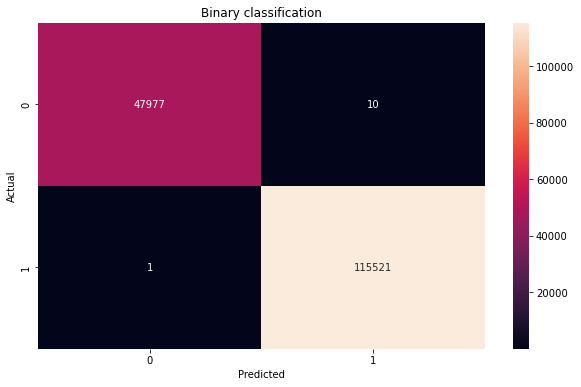

In [26]:
# plotting confusion matrix- for binary classification

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test_b,y_bin_pred),annot=True,fmt='d')
plt.title('Binary classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Splitting data for mutlinomial classification

X_multi=data.drop(['attack','attack_binary','multiclass_attack'],axis=1)
y_multi=data['multiclass_attack']

In [25]:
# Standardizing the features and model creation for multinomial classification using Decision Tree model
from sklearn.tree import DecisionTreeClassifier

X_multi_scale=scaler.fit_transform(X_multi)
X_train_m,X_test_m,y_train_m,y_test_m=train_test_split(X_multi_scale,y_multi,test_size=0.2,random_state=42) # spliting data into train and test
model_multi=DecisionTreeClassifier() # classification using decision tree
model_multi.fit(X_train_m,y_train_m)
y_pred_m=model_multi.predict(X_test_m)
multi_report=classification_report(y_test_m,y_pred_m)

print("Multinomial Classification report: ",multi_report)

Multinomial Classification report:                  precision    recall  f1-score   support

          back       1.00      1.00      1.00       182
bufferoverflow       0.78      0.88      0.82         8
 guesspassword       1.00      1.00      1.00         5
       neptune       1.00      1.00      1.00     45249
          nmap       0.99      1.00      1.00       311
        normal       1.00      1.00      1.00    115522
     portsweep       0.99      0.99      0.99       605
       rootkit       0.50      0.50      0.50         2
         satan       0.99      0.99      0.99      1031
         smurf       1.00      1.00      1.00       594

      accuracy                           1.00    163509
     macro avg       0.93      0.94      0.93    163509
  weighted avg       1.00      1.00      1.00    163509



In [27]:
# Multinomial Classification- using randomforest

model_mult=RandomForestClassifier()
model_mult.fit(X_train_m,y_train_m)
y_mult_pred=model_mult.predict(X_test_m)
mul_report=classification_report(y_test_m,y_mult_pred)
print(" Multinominal Classification Report: ",mul_report)

C:\Users\Kshitiz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kshitiz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Multinominal Classification Report:                  precision    recall  f1-score   support

          back       1.00      1.00      1.00       182
bufferoverflow       1.00      0.88      0.93         8
 guesspassword       1.00      1.00      1.00         5
       neptune       1.00      1.00      1.00     45249
          nmap       1.00      1.00      1.00       311
        normal       1.00      1.00      1.00    115522
     portsweep       1.00      1.00      1.00       605
       rootkit       0.00      0.00      0.00         2
         satan       1.00      0.99      1.00      1031
         smurf       1.00      1.00      1.00       594

      accuracy                           1.00    163509
     macro avg       0.90      0.89      0.89    163509
  weighted avg       1.00      1.00      1.00    163509



C:\Users\Kshitiz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


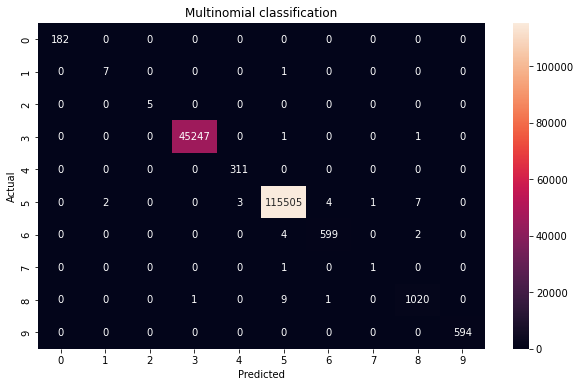

In [29]:
# plotting confusion matrix - for multinomial classification

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test_m,y_pred_m),annot=True,fmt='d')
plt.title('Multinomial classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# Feature importance

feature_name=X_bin.columns
importance=model_bin.feature_importances_
indice=np.argsort(importance)[::-1]

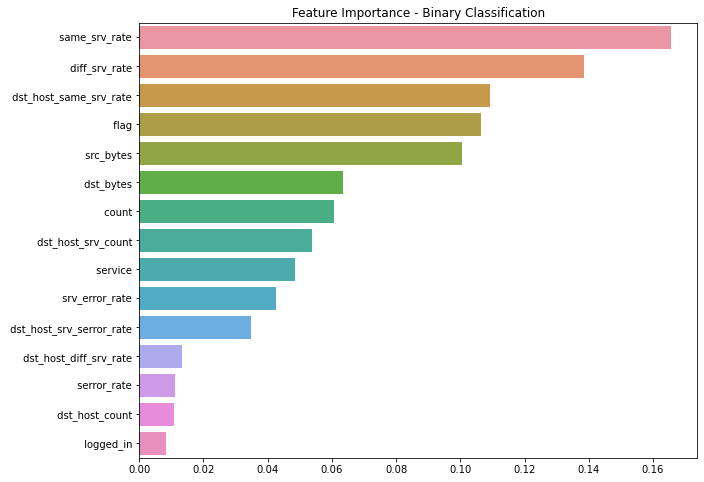

In [33]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance - Binary Classification')
sns.barplot(x=importance[indice][:15],y=feature_name[indice][:15])
plt.show()